# 4.10 _ Coding, Etiquette & Reporting

## PART 1
### 1) Import the data set you exported in Exercise 4.9.
### 2) Consider any security implications that might exist for this new data.
### 3) Create a regional segmentation of the data. 
##### 3a) Use the region information in this Wikipedia article to create your column.
##### 3b) Determine whether there’s a difference in spending habits between the different U.S. regions.
### 4) The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
### 5) Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.(part1)

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path

path = r'C:\Users\Güldeniz\Desktop\Career Foundry\2. Data Immersion\Achievement 4\Instacart  Basket Analysis'

In [3]:
path

'C:\\Users\\Güldeniz\\Desktop\\Career Foundry\\2. Data Immersion\\Achievement 4\\Instacart  Basket Analysis'

### 1) Importing the latest dataset from Task 4.9.

In [4]:
#Importing latest data

df_ords_prods_all = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [5]:
# Check the shape

df_ords_prods_all.shape

(32404859, 26)

In [6]:
df_ords_prods_all.head()

,user_id,order_number,order_hour_of_day,orders_day_of_week,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,...,frequency_flag,first_name,last_name,gender,state,age,dependant_number,family_status,income,_merge
0,1,1,8,2,0,196,Soda,7,9.0,Mid-range product,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,1,2,7,3,15,196,Soda,7,9.0,Mid-range product,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,1,3,12,3,21,196,Soda,7,9.0,Mid-range product,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,1,4,7,4,29,196,Soda,7,9.0,Mid-range product,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,1,5,15,4,28,196,Soda,7,9.0,Mid-range product,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


In [8]:
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 26 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   user_id                   int32   
 1   order_number              int8    
 2   order_hour_of_day         int8    
 3   orders_day_of_week        int8    
 4   days_since_prior_order    int8    
 5   product_id                int16   
 6   product_name              category
 7   department_id             int8    
 8   prices                    float64 
 9   price_range_loc           category
 10  busiest_and_slowest_days  category
 11  busiest_period_of_day     category
 12  max_order                 int8    
 13  loyalty_flag              category
 14  spending_flag             category
 15  order_regularity          int8    
 16  frequency_flag            category
 17  first_name                category
 18  last_name                 category
 19  gender                    category
 20  

In [9]:
ords_prods_custs = df_ords_prods_all.drop(columns = ['_merge'])

### 2) Security implications

##### This dataframe contains, personally identifiable information (PII) because of the name columns, together with state and other personal information such as gender, age and income. 

##### Since name columns (first name and surname) are problematic for data security, for the purpose of the analysis I will not use them.

In [10]:
#Creating a new dataframe without the sensitive information to keep the data secure.

df_all= ords_prods_custs.drop(columns = ['first_name','last_name'])

In [11]:
df_all.head()

,user_id,order_number,order_hour_of_day,orders_day_of_week,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,...,loyalty_flag,spending_flag,order_regularity,frequency_flag,gender,state,age,dependant_number,family_status,income
0,1,1,8,2,0,196,Soda,7,9.0,Mid-range product,...,New customer,Low spender,20,Regular customer,Female,Alabama,31,3,married,40423
1,1,2,7,3,15,196,Soda,7,9.0,Mid-range product,...,New customer,Low spender,20,Regular customer,Female,Alabama,31,3,married,40423
2,1,3,12,3,21,196,Soda,7,9.0,Mid-range product,...,New customer,Low spender,20,Regular customer,Female,Alabama,31,3,married,40423
3,1,4,7,4,29,196,Soda,7,9.0,Mid-range product,...,New customer,Low spender,20,Regular customer,Female,Alabama,31,3,married,40423
4,1,5,15,4,28,196,Soda,7,9.0,Mid-range product,...,New customer,Low spender,20,Regular customer,Female,Alabama,31,3,married,40423


### 3) Regional Segmentation

##### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [12]:
# Checking state names and counts

df_all['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

##### 3a) Use the region information in this Wikipedia article to create your column.

In [13]:
# Creating regional segmentation 

result = []

for value in df_all['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        result.append('Midwest')
    elif (value == 'Deleware') or (value == 'Maryland') or (value == 'District of Columbia') or (value == 'Virginia') or (value == 'West Virginia') or (value == 'North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value == 'Florida') or (value == 'Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):
        result.append('South')
    else:
        result.append('West')
    

In [14]:
# Checking the result

result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [15]:
# Creating new column with the results

df_all['region'] = result

In [16]:
df_all ['region'].head()

0    South
1    South
2    South
3    South
4    South
Name: region, dtype: object

In [17]:
#Controlling the results

df_all['region'].value_counts(dropna = False)

South        10154861
West          8929937
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

##### 3b) Determine whether there’s a difference in spending habits between the different U.S. regions.

In [18]:
#Checking both columns

df_all[['region', 'spending_flag']].head()

,region,spending_flag
0,South,Low spender
1,South,Low spender
2,South,Low spender
3,South,Low spender
4,South,Low spender


In [19]:
#Checking both columns

df_all[['region', 'spending_flag']].tail()

,region,spending_flag
32404854,West,High spender
32404855,South,Low spender
32404856,South,Low spender
32404857,South,Low spender
32404858,South,Low spender


In [20]:
# Creating crosstab to compare high-spender and low-spender among regions 

spending_by_region = pd.crosstab(df_all['region'],df_all['spending_flag'],dropna = False)

In [21]:
# Checking the crosstab

spending_by_region

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,193091,9961770
West,176954,8752983


In [22]:
#Copying crosstab to Excel

spending_by_region.to_clipboard()

##### In order to be able to compare the numbers, we should check the percentages.

In [23]:
# total population of Midwest

MW_total = 155975+7441350
MW_total


7597325

In [24]:
# Percent of high spenders for Midwest / total population

MW = (155975/MW_total)*100
MW

2.053025242437305

In [25]:
# total population of Northeast 

NE_total = 108225+5614511
NE_total 

5722736

In [26]:
# Percent of high spenders for Northeast / total population

NE = (108225/NE_total)*100
NE

1.8911408808653762

In [27]:
# total population of South 

S_total = 193091 + 9961770
S_total

10154861

In [28]:
# Percent of high spenders for South / total population

S = (193091/S_total)*100
S

1.9014637423397522

In [29]:
# total population of West

W_total = 176954 + 8752983
W_total

8929937

In [30]:
# Percent of high spenders for South / total population

W = (176954/W_total)*100
W

1.9815817289640454

##### The spending habits of regions are not very different from each other comparing their high spending habits. In all regions almost 2% of the customers are high spenders. All the same, Midwest has the most high-spending customers comparing to the other regions.

### 4) Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [31]:
df_all[['user_id', 'order_number']].head()

,user_id,order_number
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [32]:
# If the max orders the user has made is under 5, then the customer will be labeled a “low activity customer”

df_all.loc[df_all['max_order'] < 5, 'exclusion_flag'] = 'Yes'

In [33]:
#If the max orders the user has made is equal to or more than 5, then the customer will be labeled a “active customer”

df_all.loc[df_all['max_order'] >= 5, 'exclusion_flag'] = 'No'

In [34]:
#Checks:

df_all['exclusion_flag'].head()

0    No
1    No
2    No
3    No
4    No
Name: exclusion_flag, dtype: object

In [35]:
df_all['exclusion_flag'].tail()

32404854     No
32404855    Yes
32404856    Yes
32404857    Yes
32404858    Yes
Name: exclusion_flag, dtype: object

In [36]:
df_all['exclusion_flag'].value_counts(dropna = False)

No     30964564
Yes     1440295
Name: exclusion_flag, dtype: int64

In [37]:
df_all['exclusion_flag'].shape

(32404859,)

###### Exclusion_flag 'no' means that customers are not excluded since their order numbers are equal to or higher than 5

In [38]:
df_all.head()

,user_id,order_number,order_hour_of_day,orders_day_of_week,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,...,order_regularity,frequency_flag,gender,state,age,dependant_number,family_status,income,region,exclusion_flag
0,1,1,8,2,0,196,Soda,7,9.0,Mid-range product,...,20,Regular customer,Female,Alabama,31,3,married,40423,South,No
1,1,2,7,3,15,196,Soda,7,9.0,Mid-range product,...,20,Regular customer,Female,Alabama,31,3,married,40423,South,No
2,1,3,12,3,21,196,Soda,7,9.0,Mid-range product,...,20,Regular customer,Female,Alabama,31,3,married,40423,South,No
3,1,4,7,4,29,196,Soda,7,9.0,Mid-range product,...,20,Regular customer,Female,Alabama,31,3,married,40423,South,No
4,1,5,15,4,28,196,Soda,7,9.0,Mid-range product,...,20,Regular customer,Female,Alabama,31,3,married,40423,South,No


In [39]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 25 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   user_id                   int32   
 1   order_number              int8    
 2   order_hour_of_day         int8    
 3   orders_day_of_week        int8    
 4   days_since_prior_order    int8    
 5   product_id                int16   
 6   product_name              category
 7   department_id             int8    
 8   prices                    float64 
 9   price_range_loc           category
 10  busiest_and_slowest_days  category
 11  busiest_period_of_day     category
 12  max_order                 int8    
 13  loyalty_flag              category
 14  spending_flag             category
 15  order_regularity          int8    
 16  frequency_flag            category
 17  gender                    category
 18  state                     category
 19  age                       int8    
 20  

In [40]:
# To keep the dataframe size in  minimum, object type is turned into category

df_all ["exclusion_flag"] = df_all["exclusion_flag"].astype("category")

In [41]:
# To keep the dataframe size in  minimum, object type is turned into category

df_all ["region"] = df_all["region"].astype("category")

In [42]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 25 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   user_id                   int32   
 1   order_number              int8    
 2   order_hour_of_day         int8    
 3   orders_day_of_week        int8    
 4   days_since_prior_order    int8    
 5   product_id                int16   
 6   product_name              category
 7   department_id             int8    
 8   prices                    float64 
 9   price_range_loc           category
 10  busiest_and_slowest_days  category
 11  busiest_period_of_day     category
 12  max_order                 int8    
 13  loyalty_flag              category
 14  spending_flag             category
 15  order_regularity          int8    
 16  frequency_flag            category
 17  gender                    category
 18  state                     category
 19  age                       int8    
 20  

In [43]:
# Creating a subset set with only low-activity customers in order to exclude them from the main data without overwriting.
df_all_low_activity = df_all[df_all['exclusion_flag']=='Yes']

In [44]:
# Creating a subset set with only active customers.
df_all_active =  df_all[df_all['exclusion_flag']=='No']

In [45]:
df_all_low_activity.head()

,user_id,order_number,order_hour_of_day,orders_day_of_week,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,...,order_regularity,frequency_flag,gender,state,age,dependant_number,family_status,income,region,exclusion_flag
1510,120,1,11,3,0,196,Soda,7,9.0,Mid-range product,...,15,Regular customer,Female,Kentucky,54,2,married,99219,South,Yes
1511,120,3,8,2,19,196,Soda,7,9.0,Mid-range product,...,15,Regular customer,Female,Kentucky,54,2,married,99219,South,Yes
1512,120,1,11,3,0,-19387,Zero Calorie Cola,7,13.4,Mid-range product,...,15,Regular customer,Female,Kentucky,54,2,married,99219,South,Yes
1513,120,3,8,2,19,-19387,Zero Calorie Cola,7,13.4,Mid-range product,...,15,Regular customer,Female,Kentucky,54,2,married,99219,South,Yes
1514,120,1,11,3,0,26348,Mixed Fruit Fruit Snacks,19,3.1,Low-range product,...,15,Regular customer,Female,Kentucky,54,2,married,99219,South,Yes


In [46]:
df_all_low_activity['max_order'].value_counts()

4    753543
3    686741
2         6
1         5
Name: max_order, dtype: int64

In [47]:
#Exporting orders products customers data only with active customers

df_all_active.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_all_active.pkl'))

In [48]:
#Exporting orders products customers data only with active customers

df_all_low_activity.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_all_low_activity.pkl'))

### 5.1) Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

#### Use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

##### a)Age Profiles:

In [49]:
#Creating customer profile based on age, by creating age groups.
#Check the range for ages on the dataframe:

df_all['age'].describe()

#Min age is 18
#Max age is 81

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [50]:
df_all["age"].value_counts().sort_index()

18    500474
19    519606
20    502848
21    512527
22    513853
       ...  
77    502120
78    495311
79    529742
80    515246
81    509284
Name: age, Length: 64, dtype: int64

In [51]:
# Creating new age-groups and concerning 'age_group' column:

result = []

for value in df_all["age"]:
  if value in range (18, 25) :
    result.append("18-24")
  elif value in range (25, 35) :
    result.append("25-34")
  elif value in range (35, 45) :
    result.append("35-44") 
  elif value in range (45, 55) :
    result.append("45-54")
  elif value in range (55, 65) :
    result.append("55-64")
  elif value in range (65, 75) :
    result.append("65-74")  
  else:
    result.append("75+")
    
df_all["age_group"] = result

In [52]:
#Checking the values of age groups

df_all["age_group"].value_counts().sort_index()

18-24    3573001
25-34    5054654
35-44    5062429
45-54    5111126
55-64    5028565
65-74    5005001
75+      3570083
Name: age_group, dtype: int64

In [53]:
df_all["age_group"].shape

(32404859,)

In [54]:
age_spender = pd.crosstab(df_all['age_group'], df_all['spending_flag'], dropna = False)

In [49]:
age_spender

spending_flag,High spender,Low spender
age_group,,
18-24,70110,3502891
25-34,87504,4967150
35-44,104292,4958137
45-54,108124,5003002
55-64,100221,4928344
65-74,87900,4917101
75+,76094,3493989


In [55]:
#Copying crosstab to Excel

age_spender.to_clipboard()

##### b) Income profiles

In [56]:
#checking the income distribution

df_all['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [57]:
df_all['income'].value_counts().sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: income, Length: 108012, dtype: int64

<AxesSubplot:xlabel='income', ylabel='income'>

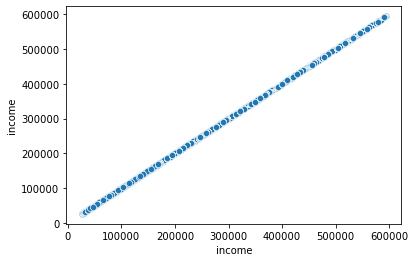

In [58]:
#Checking the outliers

sns.scatterplot(x = 'income', y = 'income', data = df_all)

<AxesSubplot:ylabel='Frequency'>

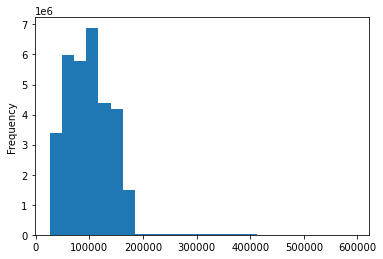

In [59]:
df_all['income'].plot.hist(bins= 25)

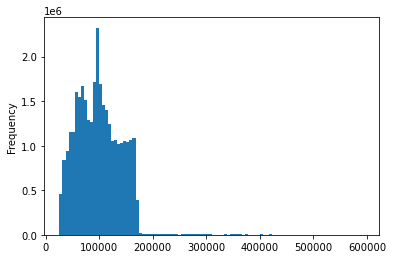

In [60]:
hist = df_all['income'].plot.hist(bins= 100)

In [61]:
df_all['income'].max()

593901

In [62]:
# Creating new income-range column and deciding the income brackets:

result = []

for value in df_all["income"]:
    if value <= 25000: 
        result.append('0-025000')
    elif (value > 25000) and (value <= 50000):
        result.append('025000-050000')
    elif (value > 50000) and (value <= 75000):
        result.append('050000-075000')
    elif (value > 75000) and (value <= 100000):
        result.append('075000-100000')
    elif (value > 100000) and (value <= 125000):
        result.append('100000-125000')
    elif (value> 125000) and (value <= 150000):
        result.append ('125000-150000')
    elif (value > 150000) and (value <= 175000):
        result.append('150000-175000')
    elif (value > 200000) and (value <= 300000):
        result.append('200000-300000')
    elif (value > 300000) and (value <= 400000):
        result.append('300000-400000')
    elif (value > 500000):
        result.append('500000+')
    else: 
        result.append('other')
        
df_all["income_range"] = result

In [63]:
df_all['income_range'].value_counts().sort_index()

025000-050000    3594083
050000-075000    6848737
075000-100000    7147837
100000-125000    6183245
125000-150000    4580117
150000-175000    3743496
200000-300000     156820
300000-400000      53931
500000+            19355
other              77238
Name: income_range, dtype: int64

In [64]:
df_all['income_range'].shape

(32404859,)

In [65]:
df_all.head()

,user_id,order_number,order_hour_of_day,orders_day_of_week,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,...,gender,state,age,dependant_number,family_status,income,region,exclusion_flag,age_group,income_range
0,1,1,8,2,0,196,Soda,7,9.0,Mid-range product,...,Female,Alabama,31,3,married,40423,South,No,25-34,025000-050000
1,1,2,7,3,15,196,Soda,7,9.0,Mid-range product,...,Female,Alabama,31,3,married,40423,South,No,25-34,025000-050000
2,1,3,12,3,21,196,Soda,7,9.0,Mid-range product,...,Female,Alabama,31,3,married,40423,South,No,25-34,025000-050000
3,1,4,7,4,29,196,Soda,7,9.0,Mid-range product,...,Female,Alabama,31,3,married,40423,South,No,25-34,025000-050000
4,1,5,15,4,28,196,Soda,7,9.0,Mid-range product,...,Female,Alabama,31,3,married,40423,South,No,25-34,025000-050000


In [67]:
df_all["income_groups"].head()

0    low income
1    low income
2    low income
3    low income
4    low income
Name: income_groups, dtype: object

In [68]:
# Checking the income groups

df_all['income_groups'].value_counts().sort_index()

high income             205721
low income            10442820
middle high income     8323613
middle income         13331082
very high income        101623
Name: income_groups, dtype: int64

In [69]:
df_all['income_groups'].shape

(32404859,)

##### c) Dependants profiles

In [70]:
# Checking the number of dependents

df_all['dependant_number'].value_counts().sort_index()

0    8097503
1    8081104
2    8091143
3    8135109
Name: dependant_number, dtype: int64

In [71]:
# Creating parental_status (parent - non parent)

df_all.loc[df_all['dependant_number'] == 0, 'parental_status'] = 'non parent'
df_all.loc[df_all['dependant_number'] >= 1, 'parental_status'] = 'parent'

In [72]:
# Checking the number of parents

df_all['parental_status'].value_counts().sort_index()

non parent     8097503
parent        24307356
Name: parental_status, dtype: int64

In [73]:
df_all['parental_status'].shape

(32404859,)

##### d) Products by departments profile

In [74]:
#Checking the product and department realted columns

df_all[['prices', 'product_id', 'product_name', 'department_id']].head()

,prices,product_id,product_name,department_id
0,9.0,196,Soda,7
1,9.0,196,Soda,7
2,9.0,196,Soda,7
3,9.0,196,Soda,7
4,9.0,196,Soda,7


In [75]:
# import of orders_products data

df_department = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [76]:
df_department

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


In [77]:
# New column with department names:

result = []

for value in df_all["department_id"]:
  if value == 1:
    result.append("frozen")
  elif value == 2:
    result.append("other")
  elif value == 3:
    result.append("bakery") 
  elif value == 4:
    result.append("produce")
  elif value == 5:
    result.append("alcohol")
  elif value == 6:
    result.append("international") 
  elif value == 7:
    result.append("beverages")
  elif value == 8:
    result.append("pets")
  elif value == 9:
    result.append("dry goods pasta")
  elif value == 10:
    result.append("bulk")
  elif value == 11:
    result.append("personal care")
  elif value == 12:
    result.append("meat seafood")
  elif value == 13:
    result.append("pantry")
  elif value == 14:
    result.append("breakfast")
  elif value == 15:
    result.append("canned goods")
  elif value == 16:
    result.append("dairy eggs")
  elif value == 17:
    result.append("household")
  elif value == 18:
    result.append("babies")
  elif value == 19:
    result.append("snacks")
  elif value == 20:
    result.append("deli")
  else:
    result.append("NaN")
    
df_all["department"] = result

In [78]:
df_all['department'].head

<bound method NDFrame.head of 0              beverages
1              beverages
2              beverages
3              beverages
4              beverages
                ...     
32404854       beverages
32404855    meat seafood
32404856    meat seafood
32404857    meat seafood
32404858    meat seafood
Name: department, Length: 32404859, dtype: object>

In [79]:
df_all[['department_id', 'department']].head()

,department_id,department
0,7,beverages
1,7,beverages
2,7,beverages
3,7,beverages
4,7,beverages


In [81]:
df_all['department'].shape

(32404859,)

In [80]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   user_id                   int32   
 1   order_number              int8    
 2   order_hour_of_day         int8    
 3   orders_day_of_week        int8    
 4   days_since_prior_order    int8    
 5   product_id                int16   
 6   product_name              category
 7   department_id             int8    
 8   prices                    float64 
 9   price_range_loc           category
 10  busiest_and_slowest_days  category
 11  busiest_period_of_day     category
 12  max_order                 int8    
 13  loyalty_flag              category
 14  spending_flag             category
 15  order_regularity          int8    
 16  frequency_flag            category
 17  gender                    category
 18  state                     category
 19  age                       int8    
 20  


##### Correcting the data types:

In [82]:
df_all ["age_group"] = df_all["age_group"].astype("category")

In [83]:
df_all ["income_range"] = df_all["income_range"].astype("category")

In [84]:
df_all ["income_groups"] = df_all["income_groups"].astype("category")

In [85]:
df_all ["parental_status"] = df_all["parental_status"].astype("category")

In [86]:
df_all ["department"] = df_all["department"].astype("category")

In [87]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   user_id                   int32   
 1   order_number              int8    
 2   order_hour_of_day         int8    
 3   orders_day_of_week        int8    
 4   days_since_prior_order    int8    
 5   product_id                int16   
 6   product_name              category
 7   department_id             int8    
 8   prices                    float64 
 9   price_range_loc           category
 10  busiest_and_slowest_days  category
 11  busiest_period_of_day     category
 12  max_order                 int8    
 13  loyalty_flag              category
 14  spending_flag             category
 15  order_regularity          int8    
 16  frequency_flag            category
 17  gender                    category
 18  state                     category
 19  age                       int8    
 20  


##### Product and department profiling cont.

In [88]:
# Get the amount of sales for each product id
sales_product_id = df_all.groupby('product_id').agg({'prices' : ['min', 'mean', 'max', 'sum']})

In [89]:
sales_product_id.to_clipboard()

In [90]:
# Total sales for each product
sales_products = df_all.groupby('product_name').agg({'prices' : ['min', 'mean', 'max', 'sum']})

In [91]:
sales_products.to_clipboard()

In [92]:
#Total sales according to dept id.
sales_department_id = df_all.groupby('department_id').agg({'prices' : ['min', 'mean', 'max', 'sum']})

In [93]:
sales_department_id.to_clipboard()

In [94]:
#Total sales in each department
sales_department = df_all.groupby('department').agg({'prices' : ['min', 'mean', 'max', 'sum']})

In [95]:
sales_department.to_clipboard()

##### Top 3 departments make up more than 50% of all sales: produce, dairy eggs, and beverages

In [96]:
# Amount of orders for each product name
sales_order_number = df_all.groupby('product_name').agg({'order_number' : ['min', 'mean', 'max', 'sum']})

In [97]:
sales_order_number.to_clipboard()

In [98]:
# Amount of orders in each department
orders_department = df_all.groupby('department').agg({'order_number' : ['min', 'mean', 'max', 'sum']})

In [99]:
orders_department.to_clipboard()

In [144]:
# Creating popularity grouping for departments:

result = []

for value in df_all['department']:
    if (value == 'produce') or (value == 'dairy eggs') or (value == 'beverages') or (value == 'frozen') or (value == 'pantry') or (value == 'snacks'):
        result.append('best selling department')
    elif (value == 'meat seafood') or (value == 'bakery') or (value == 'deli') or (value == 'canned goods') or (value == 'dry goods pasta') or (value == 'breakfast') or (value == 'household'):
        result.append('good sellers')
    elif (value == 'personal care')  or (value == 'babies') or (value == 'international') or (value == 'alcohol') or (value == 'pets') or (value == 'bulk') or (value == 'other'):
        result.append('worst selling department')
    else:
        result.append('NaN')
        
df_all['department_popularity'] = result

In [145]:
df_all['department_popularity']

0           best selling department
1           best selling department
2           best selling department
3           best selling department
4           best selling department
                     ...           
32404854    best selling department
32404855               good sellers
32404856               good sellers
32404857               good sellers
32404858               good sellers
Name: department_popularity, Length: 32404859, dtype: object

In [101]:
# Creating a list of top 30 selling products by price (since these products equalst to around 15% of total sale)

top_product_list = ['Banana', 'Bag of Organic Bananas', 'Large Lemon', 'Limes', 'Organic Baby Spinach', 'Organic Strawberries', 'Organic Whole Milk', 'Cucumber Kirby', 'Apple Honeycrisp Organic','Organic Cucumber','Organic Avocado','Asparagus','Organic Baby Carrots','Michigan Organic Kale','Organic Hass Avocado','Organic Tomato Cluster','Organic Blueberries','Organic Zucchini','Half & Half','Carrots','Organic Blackberries','Organic Garlic','Organic Grape Tomatoes','Organic Large Extra Fancy Fuji Apple','Organic Gala Apples', 'Organic Navel Orange', 'Grated Parmesan', 'Bunched Cilantro', 'Uncured Genoa Salami']

In [147]:
# Creating top selling flag

result = []

for value in df_all['product_name']:
    if value in top_product_list:
        result.append('Top selling product')
    else:
        result.append('other products')
        
df_all['top_selling_products'] = result

In [146]:
df_all.head()

,user_id,order_number,order_hour_of_day,orders_day_of_week,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,...,exclusion_flag,age_group,income_range,income_groups,parental_status,department,department_popularity,top_selling_products,day_of_week,day_time
0,1,1,8,2,0,196,Soda,7,9.0,Mid-range product,...,No,25-34,025000-050000,low income,parent,beverages,best selling department,other products,Monday,Morning
1,1,2,7,3,15,196,Soda,7,9.0,Mid-range product,...,No,25-34,025000-050000,low income,parent,beverages,best selling department,other products,Tuesday,Morning
2,1,3,12,3,21,196,Soda,7,9.0,Mid-range product,...,No,25-34,025000-050000,low income,parent,beverages,best selling department,other products,Tuesday,Noon
3,1,4,7,4,29,196,Soda,7,9.0,Mid-range product,...,No,25-34,025000-050000,low income,parent,beverages,best selling department,other products,Wednesday,Morning
4,1,5,15,4,28,196,Soda,7,9.0,Mid-range product,...,No,25-34,025000-050000,low income,parent,beverages,best selling department,other products,Wednesday,Afternoon


In [104]:
df_all['top_selling_products'].value_counts()

other products         28760420
Top selling product     3644439
Name: top_selling_products, dtype: int64

In [105]:
df_all['top_selling_products'].shape

(32404859,)

##### e) Weekdays

In [106]:
# Creating weekdays with loc function 

df_all.loc[df_all['orders_day_of_week'] == 0, 'day_of_week'] = 'Saturday'
df_all.loc[df_all['orders_day_of_week'] == 1, 'day_of_week'] = 'Sunday'
df_all.loc[df_all['orders_day_of_week'] == 2, 'day_of_week'] = 'Monday'
df_all.loc[df_all['orders_day_of_week'] == 3, 'day_of_week'] = 'Tuesday'
df_all.loc[df_all['orders_day_of_week'] == 4, 'day_of_week'] = 'Wednesday'
df_all.loc[df_all['orders_day_of_week'] == 5, 'day_of_week'] = 'Thursday'
df_all.loc[df_all['orders_day_of_week'] == 6, 'day_of_week'] = 'Friday'

In [107]:
# Check order totals for weekdays 

df_all['day_of_week'].value_counts()

Saturday     6204182
Sunday       5660230
Friday       4496490
Monday       4213830
Thursday     4205791
Tuesday      3840534
Wednesday    3783802
Name: day_of_week, dtype: int64

In [108]:
orders_day_of_week = pd.crosstab(df_all['order_number'],df_all['day_of_week'],dropna = False)

In [109]:
orders_day_of_week

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
order_number,,,,,,,
1,305542,266266,425095,356512,253465,239945,229271
2,295356,265935,404851,358602,254061,239247,228357
3,289739,267958,410202,355190,255995,239064,230720
4,255410,239297,361811,315785,225073,215604,205629
5,231756,212188,319918,279666,202619,192231,188523
...,...,...,...,...,...,...,...
95,1653,1971,1590,2785,2424,1889,2204
96,1611,2020,1801,2370,1926,2092,1917
97,1459,1914,1735,2486,1987,1711,2064


##### f)Day times

In [110]:
# Aggreagting hours of days as morning, noon, afternoon, evening, night:
    
result = []

for value in df_all['order_hour_of_day']:
    if value in range (6, 11):
        result.append('Morning')
    elif value in range (11, 13):
        result.append('Noon')
    elif value in range (13, 16):
        result.append('Afternoon')
    elif value in range (16, 22):
        result.append('Evening')
    else: 
        result.append('Night')

In [111]:
df_all['day_time']=result

In [112]:
df_all['day_time'].value_counts()

Evening      9289456
Morning      8115628
Afternoon    8012234
Noon         5354672
Night        1632869
Name: day_time, dtype: int64

In [113]:
df_all['day_time'].shape

(32404859,)

##### g) Family status profiles

In [114]:
df_all['family_status'].value_counts()

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: family_status, dtype: int64

##### Crosstabs

In [115]:
# 1) crosstab of age_groups & spendig habits

 
age_spending = pd.crosstab(df_all['age_group'], df_all['spending_flag'], dropna = False)

In [116]:
age_spending

spending_flag,High spender,Low spender
age_group,,
18-24,70110,3502891
25-34,87504,4967150
35-44,104292,4958137
45-54,108124,5003002
55-64,100221,4928344
65-74,87900,4917101
75+,76094,3493989


In [117]:
#Copying age_groups & spendig habits

age_spending.to_clipboard()

In [118]:
# 2) crosstab of age_group & parental_status 

age_parenthood = pd.crosstab(df_all['age_group'], df_all['parental_status'], dropna = False)

In [119]:
age_parenthood

parental_status,non parent,parent
age_group,,
18-24,863578,2709423
25-34,1293349,3761305
35-44,1257524,3804905
45-54,1254465,3856661
55-64,1308503,3720062
65-74,1232677,3772324
75+,887407,2682676


In [120]:
#Copying crosstab to Excel

age_parenthood.to_clipboard()

In [121]:
# 3) crosstab of parental_status & spendig habits

parenthood_spending = pd.crosstab(df_all['parental_status'], df_all['spending_flag'], dropna = False)

In [122]:
parenthood_spending

spending_flag,High spender,Low spender
parental_status,,
non parent,153532,7943971
parent,480713,23826643


In [123]:
#Copying crosstab to Excel

parenthood_spending.to_clipboard()

In [124]:
# 4) crosstab of age_group & department 

age_department = pd.crosstab(df_all['department'], df_all['age_group'], dropna = False)

In [125]:
age_department

age_group,18-24,25-34,35-44,45-54,55-64,65-74,75+
department,,,,,,,
NaN,7989,10988,10403,11337,10334,10518,7576
alcohol,18557,24064,22680,25326,24033,23013,16023
babies,47389,63703,69157,69655,64453,63521,45924
bakery,129306,183446,183462,184674,182018,179550,129972
beverages,292004,416097,414230,428696,422264,417015,297817
breakfast,78935,110102,108954,111828,109370,106262,77582
bulk,3872,5430,5391,5416,5222,5400,3842
canned goods,117855,168036,166695,168174,164860,165912,116526
dairy eggs,597035,848269,845477,849262,832491,834502,591711


In [126]:
#  Copying crosstab to Excel

age_department.to_clipboard()

In [127]:
# 5) crosstab of family status & department 

fam_dept = pd.crosstab(df_all['department'], df_all['family_status'], dropna = False)

In [128]:
fam_dept

family_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
NaN,5493,3571,48486,11595
alcohol,12615,8896,105682,26503
babies,35326,20146,297162,71168
bakery,100401,56142,821881,194004
beverages,231025,124629,1889052,443417
breakfast,59498,34731,493725,115079
bulk,2765,1674,24621,5513
canned goods,89259,51190,752030,175579
dairy eggs,461911,260787,3788598,887451


In [129]:
#  Copying crosstab to Excel

fam_dept.to_clipboard()

In [130]:
# 6) crosstab of family status & department 

fam_income = pd.crosstab(df_all['income_groups'], df_all['family_status'], dropna = False)

In [131]:
fam_income

family_status,divorced/widowed,living with parents and siblings,married,single
income_groups,,,,
high income,21230,7157,147771,29563
low income,421914,940836,6895363,2184707
middle high income,1115661,9115,6208676,990161
middle income,1205427,591400,9432885,2101370
very high income,7580,2095,72058,19890


In [132]:
#  Copying crosstab to Excel

fam_income.to_clipboard()

In [133]:
# 7) crosstab of family status & age groups

fam_age = pd.crosstab(df_all['family_status'], df_all['age_group'], dropna = False)

In [134]:
fam_age

age_group,18-24,25-34,35-44,45-54,55-64,65-74,75+
family_status,,,,,,,
divorced/widowed,0,0,0,0,651728,1232677,887407
living with parents and siblings,1550603,0,0,0,0,0,0
married,1158820,3761305,3804905,3856661,3720062,3772324,2682676
single,863578,1293349,1257524,1254465,656775,0,0


In [135]:
#  Copying crosstab to Excel

fam_age.to_clipboard()

In [136]:
# 8) crosstab of income group & department 

income_dept = pd.crosstab(df_all['department'], df_all['income_groups'], dropna = False)

In [137]:
income_dept

income_groups,high income,low income,middle high income,middle income,very high income
department,,,,,
NaN,298,22456,18076,28206,109
alcohol,4791,48195,37467,60403,2840
babies,1716,119538,114742,187073,733
bakery,10390,360332,307177,489586,4943
beverages,19539,958052,658623,1042490,9419
breakfast,5324,245791,173888,275627,2403
bulk,24,12369,8289,13886,5
canned goods,7111,314806,286886,455328,3927
dairy eggs,37005,1680073,1406577,2258184,16908


In [138]:
#  Copying crosstab to Excel

income_dept.to_clipboard()

##### Export

In [148]:
#Exporting the data frame, as notebook is taking up so much space in RAM.
df_all.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'df_all_final.1.pkl'))